# Fate/Grand Order Servants Dataset Analysis and Visualization

### Data Download

In [263]:
import requests

url = "https://api.atlasacademy.io/export/JP/nice_servant_lore_lang_en.json"

res = requests.request("GET", url)

rawData: dict = res.json()

for s in rawData:
    s['traits'] = list(map(lambda x: x['name'], s['traits']))
    s['saberface'] = 'saberface' in s['traits']

len(rawData)

384

### Data Cleaning

The following columns are not useful for the analysis so needs to be removed
- ruby
- originalBattleName
- classId
- cost
- lvlMax
- extraAssets
- starAbsorb
- starGen
- instantDeathChance
- cardDetails
- relateQuestIds
- trialQuestIds
- growthCurve
- valentineEquip
- valentineScript
- ascensionAdd
- traitAdd
- svtChange
- ascensionImage
- coin
- script


In [264]:
import pandas as pd
df = pd.DataFrame(rawData)

df['illustrator'] = df['profile'].map(lambda x: x['illustrator'])
df = df[df["type"] != 'enemyCollectionDetail']

cleanData = df.drop(columns=[
    'ruby',
    'originalBattleName',
    'originalName',
    'classId',
    'cost',
    'lvMax',
    'extraAssets',
    'starAbsorb',
    'starGen',
    'instantDeathChance',
    'cardDetails',
    'relateQuestIds',
    'trialQuestIds',
    'growthCurve',
    'valentineEquip',
    'valentineScript',
    'ascensionAdd',
    'traitAdd',
    'svtChange',
    'ascensionImage',
    'coin',
    'script',
    'profile'
])

cleanData.filter(items=['name', 'className', 'type', 'rarity', 'gender', 'traits' 'illustrator'])

,name,className,type,rarity,gender
0,Altria Pendragon,saber,normal,5,female
1,Altria Pendragon (Alter),saber,normal,4,female
2,Altria Pendragon (Lily),saber,normal,4,female
3,Nero Claudius,saber,normal,4,female
4,Nero Claudius (Bride),saber,normal,5,female
...,...,...,...,...,...
373,Hephaestion,pretender,normal,4,female
374,Lady Avalon,pretender,normal,5,female
375,Nine-Tattoo Dragon Eliza,pretender,normal,4,female
376,Tenochtitlan,pretender,normal,4,female


### Data Caching

In [265]:
cleanData.to_json("dataset.json", indent=1)

In [266]:

import matplotlib.pyplot as plt

### Servants per Class

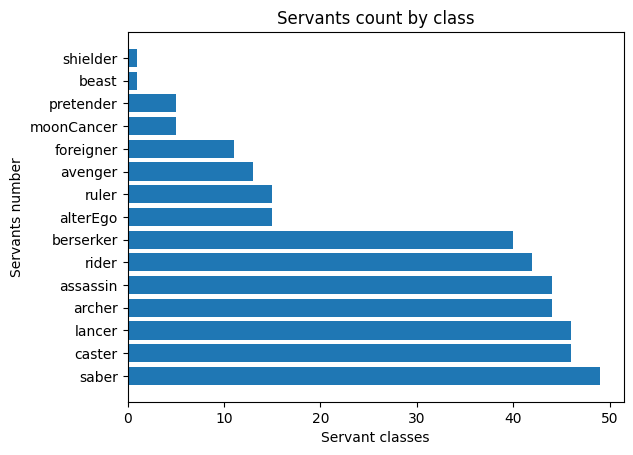

In [267]:
servants_per_class = df.groupby("className").count().sort_values(by="id", ascending=False)["id"]
classes = list(servants_per_class.keys())
values = servants_per_class.values
plt.barh(classes, values)
plt.xlabel("Servant classes")
plt.ylabel("Servants number")
plt.title("Servants count by class")
plt.show()

# Griglia, colori diversi per classi extra, capire cosa fare con le mono (aggregarle?), numeri precisi a fine colonna, idee qui: https://www.geeksforgeeks.org/bar-plot-in-matplotlib/

In [268]:
# Torta con extra classes vs normali vs beast?

## Statistics by rarity

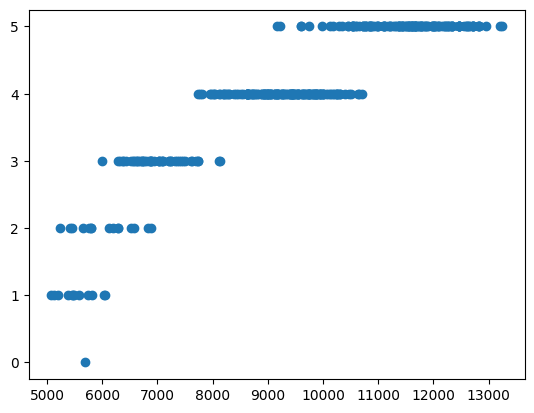

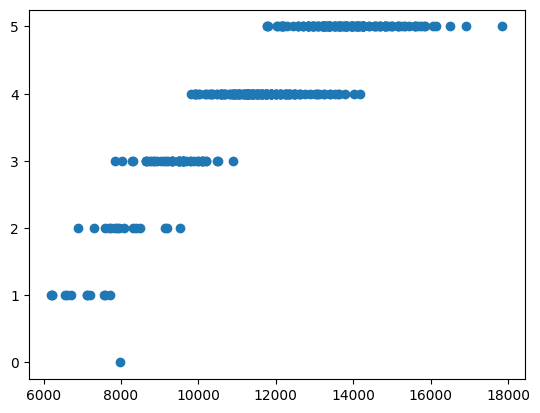

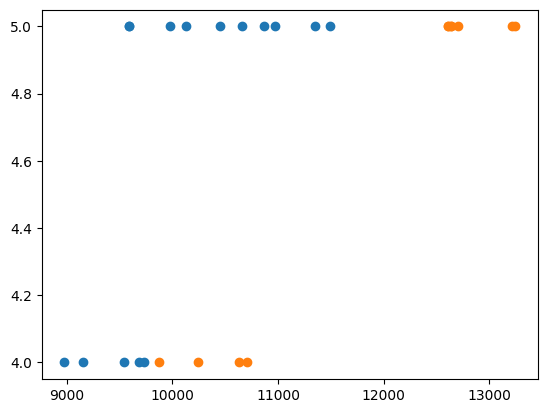

In [280]:
# Confronto rarita' e statistiche
# Confronto classe e statistiche
servants_statistics_clean = cleanData[(cleanData["atkMax"] < 20000) &(cleanData["hpMax"] < 22000)]
plt.scatter(servants_statistics_clean["atkMax"].values, servants_statistics_clean["rarity"].values)
plt.show()

plt.scatter(servants_statistics_clean["hpMax"].values, servants_statistics_clean["rarity"].values)
plt.show()

# Ruler vs Avenger in hp e danni, da rivedere
servants_ruler = servants_statistics_clean[(servants_statistics_clean["className"] == 'ruler') & (servants_statistics_clean["rarity"] > 3)]
servants_avenger = servants_statistics_clean[(servants_statistics_clean["className"] == 'avenger') & (servants_statistics_clean["rarity"] > 3)]
plt.scatter(servants_ruler["atkMax"].values, servants_ruler["rarity"].values)
plt.scatter(servants_avenger["atkMax"].values, servants_avenger["rarity"].values)
plt.show()

In [270]:
# NP type (danno o meno) e correlazione con l'essere caster

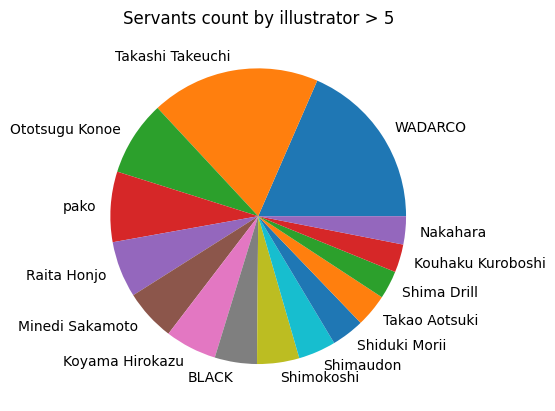

In [272]:
servants_by_illustrator = cleanData.groupby(by='illustrator').count().sort_values(by="id", ascending=False)["id"]
servants_by_illustrator  = servants_by_illustrator[servants_by_illustrator > 5]
illustrators = list(servants_by_illustrator.keys())
values = servants_by_illustrator.values
plt.pie(values,labels=illustrators)
plt.title("Servants count by illustrator > 5")
plt.show()

### Servants illustrated by Takeuchi by the presence of the "saberface" trait

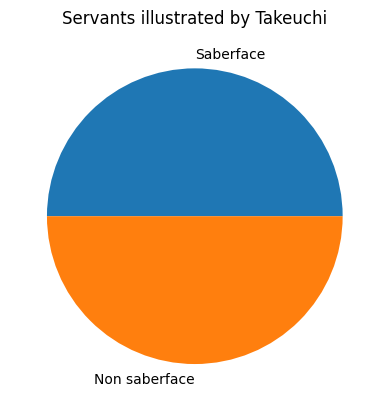

In [273]:
servants_by_take = cleanData[cleanData["illustrator"] == "Takashi Takeuchi"].copy()
servants_by_take = servants_by_take.groupby(by='saberface').count().sort_values(by="id", ascending=False)
values = servants_by_take["id"].values
plt.pie(values,labels=["Saberface", "Non saberface"])
plt.title("Servants illustrated by Takeuchi")
plt.show() #renderlo a barre e far vedere la distribuzione totale vs quella di take

Servants illustrated by WADARCO by class being extra or not

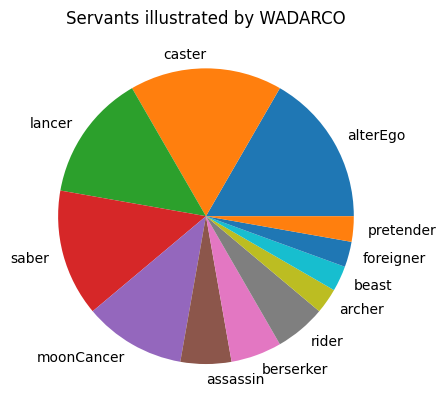

In [274]:
servants_by_wada = cleanData[cleanData["illustrator"] == "WADARCO"].copy()
servants_by_wada = servants_by_wada.groupby(by='className').count().sort_values(by="id", ascending=False)
values = servants_by_wada["id"].values
plt.pie(values,labels=servants_by_wada["id"].keys())
plt.title("Servants illustrated by WADARCO")
plt.show()